
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a) simulate phone dataset

([Text(0.5, 0, 'called minutes per month'),
  Text(0, 0.5, 'sek per month'),
  Text(0.5, 1.0, 'phone subscription')],)

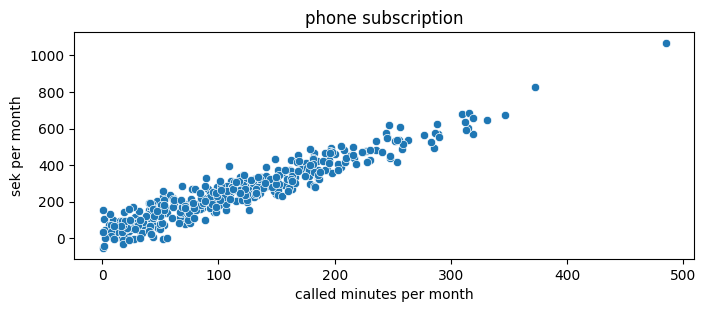

In [2]:
def y(x): return 2*x+25+error_term
def y_truth(x): return 2*x+25


np.random.seed(42)
phone_x=np.abs(np.random.normal(100,100,400))
error_term = np.random.normal(loc=0,scale=50,size=400)
phone_y = y(phone_x)

phone_df = pd.DataFrame({'y':phone_y, 'x':phone_x})

fig, ax = plt.subplots(figsize=(8,3),dpi=100)
sns.scatterplot(data=phone_df, x='x', y='y')
ax.set(xlabel='called minutes per month', ylabel='sek per month', title='phone subscription'),


b) remove outliers

In [3]:
phone_df_remove_outliers = phone_df[phone_df['y']>=0]
phone_df_remove_outliers = phone_df_remove_outliers[phone_df_remove_outliers['x']<=300]
phone_df_remove_outliers

,y,x
0,244.621448,149.671415
1,167.378389,86.173570
2,354.799893,164.768854
3,531.955001,252.302986
4,155.666051,76.584663
...,...,...
395,183.822512,53.082435
396,165.649148,71.313453
397,529.849510,235.387237
398,203.507950,88.546015


In [4]:
phone_df_remove_outliers.describe()

,y,x
count,381.000000,381.000000
mean,246.203236,110.608181
std,143.270223,70.695220
min,2.706290,0.252936
25%,137.119904,49.652435
50%,241.306311,106.428002
75%,335.261498,161.167629
max,623.193172,289.679298


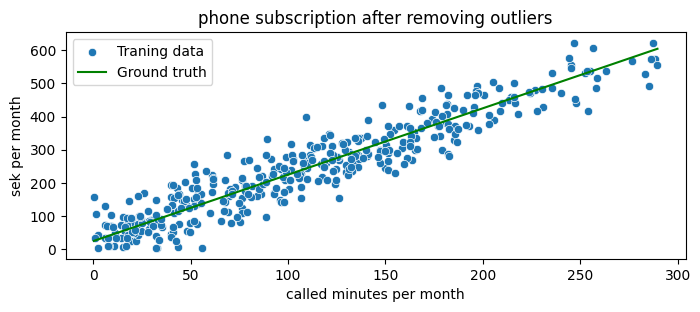

In [5]:
fig, ax = plt.subplots(figsize=(8,3),dpi=100)
sns.scatterplot(data=phone_df_remove_outliers, x='x', y='y')
sns.lineplot(x=phone_df_remove_outliers['x'], y=y_truth(phone_df_remove_outliers['x']), color='green')
ax.set(xlabel='called minutes per month', ylabel='sek per month', title='phone subscription after removing outliers')
ax.legend(['Traning data','Ground truth'])

In [6]:
phone_cost = phone_df_remove_outliers.copy()

## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [7]:
def train_test_split(X: pd.DataFrame, y:pd.DataFrame, train_fraction=.7, random_state=42, replace=False) -> tuple:
    X_train = X.sample(frac=train_fraction, random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)
    y_train = y.sample(frac=train_fraction, random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)
    
    return (X_train, X_test, y_train, y_test)

In [8]:
phone_cost.head()

,y,x
0,244.621448,149.671415
1,167.378389,86.173570
2,354.799893,164.768854
3,531.955001,252.302986
4,155.666051,76.584663


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X=phone_cost['x'], y=phone_cost['y'])
print(f"Length of X_train: {len(X_train)} ")
print(f"Length of X_test: {len(X_test)} ")
print(f"Length of y_train: {len(y_train)} ")
print(f"Length of y_test: {len(y_test)} ")

Length of X_train: 267 
Length of X_test: 114 
Length of y_train: 267 
Length of y_test: 114 


In [10]:
print(f'X: there are {X_train.index.isin(X_test.index).sum()} data from train in testing')
print(f'y: there are {y_train.index.isin(y_test.index).sum()} data from train in testing')

X: there are 0 data from train in testing
y: there are 0 data from train in testing


In [11]:
print(f'summing the lengths of X_train and X_test data, I get {len(X_train) + len(X_test)} observations. And there are totally {phone_cost.shape[0]} observations in phone dataset.')

summing the lengths of X_train and X_test data, I get 381 observations. And there are totally 381 observations in phone dataset.


## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

In [12]:
beta_1, beta_0 = np.polyfit(X_train, y_train, deg=1)

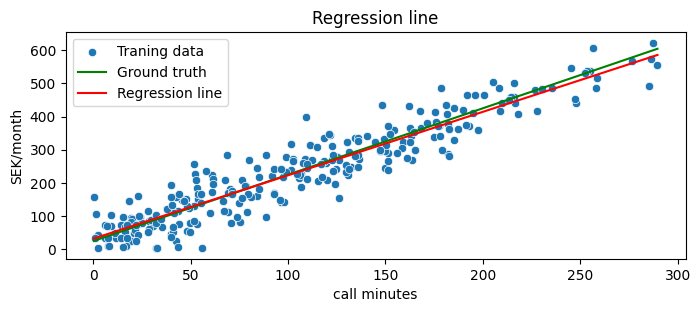

In [13]:
def y_hat(x): return beta_0 + beta_1*x
fig, ax= plt.subplots(dpi=100, figsize=(8,3))
sns.scatterplot(x=X_train, y=y_train)
sns.lineplot(x=X_train, y= y_truth(X_train), color='green')
sns.lineplot(x=X_train, y=y_hat(X_train), color='red')
ax.set(xlabel='call minutes', ylabel='SEK/month', title='Regression line')
ax.legend(['Traning data','Ground truth','Regression line'])

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

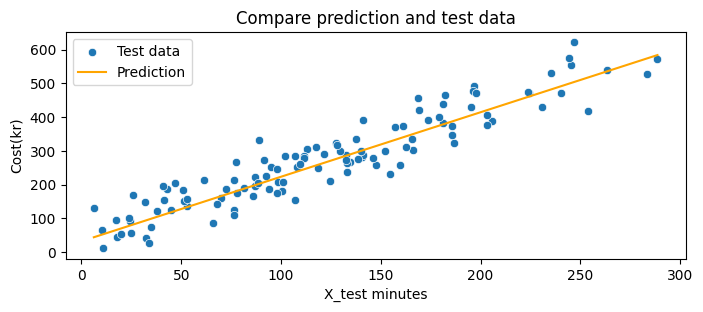

In [14]:
fig, ax = plt.subplots(figsize=(8,3), dpi=100)
sns.scatterplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=y_hat(X_test), color='orange')
ax.set(xlabel='X_test minutes', ylabel='Cost(kr)', title='Compare prediction and test data')
ax.legend(['Test data','Prediction'])

In [15]:
m = len(y_test)
y_test_hat = y_hat(X_test)

#y_test_hat= np.reshape(y_test_hat, m)

MAE = 1/m * np.sum(np.abs(y_test-y_test_hat))
MSE = 1/m * np.sum((y_test-y_test_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(40.28516651297973, 2419.67593453563, 49.19020161104882)

## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


In [16]:
np.random.seed(42)
X1 = np.abs(np.random.normal(100, 100, 10000))
X2 = np.random.randint(0,50, 10000)
X3 = np.abs(np.random.normal(0,2, 10000))
e = np.random.normal(0,50, 10000)
y = 25+2*X1+0.5*X2+50*X3+e

df4 = pd.DataFrame({'Minutes': X1, 'SMS':X2, 'Surf(GB)':X3, 'Cost':y})
df4.insert(0, 'Intercept', 1)

In [17]:
df4

,Intercept,Minutes,SMS,Surf(GB),Cost
0,1,149.671415,41,2.263011,502.396003
1,1,86.173570,16,0.031570,179.072107
2,1,164.768854,30,0.808925,430.008213
3,1,252.302986,33,2.625826,647.244277
4,1,76.584663,37,3.388079,398.016588
...,...,...,...,...,...
9995,1,230.110206,36,0.611639,473.661741
9996,1,99.834497,18,1.328020,298.342321
9997,1,29.468328,19,2.811456,252.973057
9998,1,149.576557,31,3.439294,536.176482


Text(0.5, 1.03, 'Histograms')

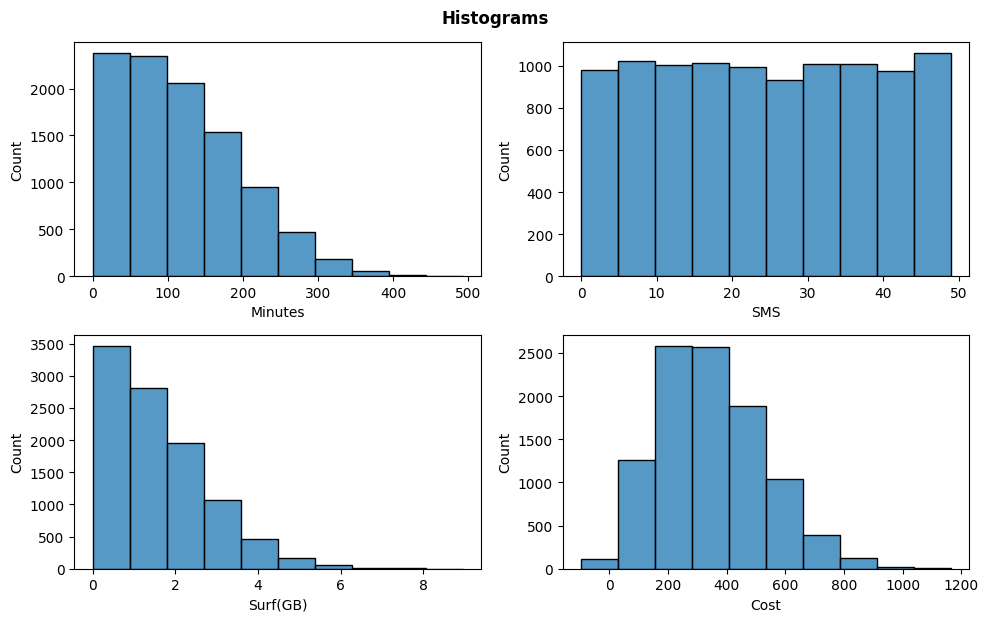

In [18]:
fig, axes = plt.subplots(2,2, figsize=(10,6), dpi=100)
for ax, feature in zip(axes.flatten(), df4.columns[-4: ]):
    sns.histplot(data=df4, x=feature, ax = ax, bins=10)
fig.tight_layout()
fig.suptitle("Histograms", y=1.03, fontweight="bold")
    

In [19]:
def remove_outliers(df):
    df_remove_outliers = df[df['Surf(GB)']<4]
    df_remove_outliers = df_remove_outliers[df_remove_outliers['Minutes']<300]
    df_remove_outliers = df_remove_outliers[df_remove_outliers['Cost']>=0]
    return df_remove_outliers

In [20]:
df4_remove_outliers =  remove_outliers(df4)
df4_remove_outliers.shape

(9320, 5)

Text(0.5, 1.03, 'Histograms of data removed outliers')

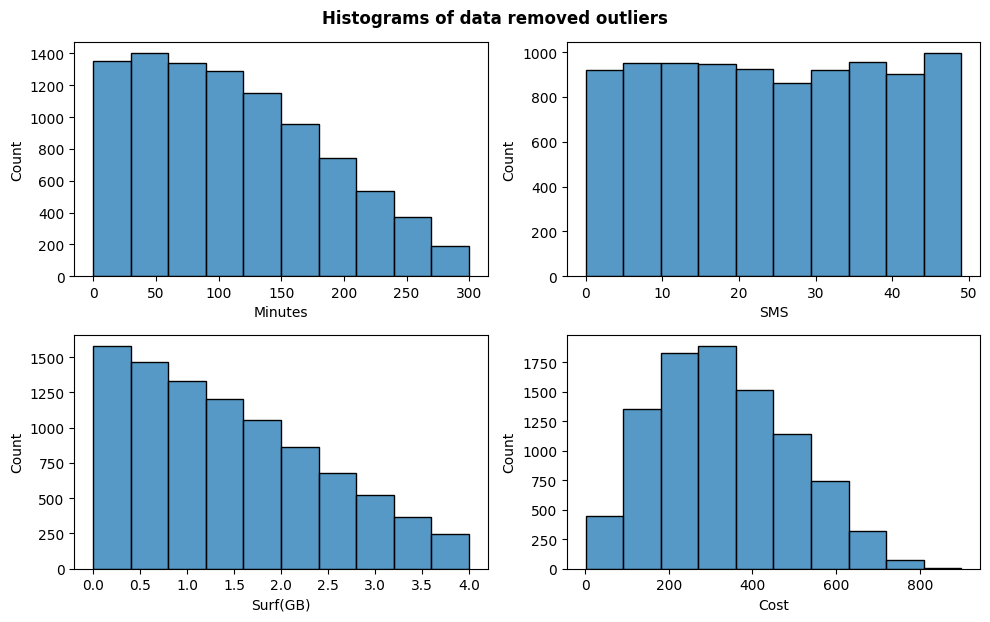

In [21]:
fig, axes = plt.subplots(2,2, figsize=(10,6), dpi=100)
for ax, feature in zip(axes.flatten(), df4_remove_outliers.columns[-4: ]):
    sns.histplot(data=df4_remove_outliers, x=feature, ax = ax, bins=10)
fig.tight_layout()
fig.suptitle("Histograms of data removed outliers", y=1.03, fontweight="bold")

## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

a) Perform a train|test split with 0.8 of the data for training. (*)

In [22]:
df5 = df4_remove_outliers.copy()
df5

,Intercept,Minutes,SMS,Surf(GB),Cost
0,1,149.671415,41,2.263011,502.396003
1,1,86.173570,16,0.031570,179.072107
2,1,164.768854,30,0.808925,430.008213
3,1,252.302986,33,2.625826,647.244277
4,1,76.584663,37,3.388079,398.016588
...,...,...,...,...,...
9995,1,230.110206,36,0.611639,473.661741
9996,1,99.834497,18,1.328020,298.342321
9997,1,29.468328,19,2.811456,252.973057
9998,1,149.576557,31,3.439294,536.176482


In [23]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df5.drop('Cost', axis='columns'), df5['Cost'], train_fraction=0.8)


In [24]:
X_train.index.isin(X_test.index).sum()

0

In [25]:
X_train

,Intercept,Minutes,SMS,Surf(GB)
1633,1,202.996082,39,1.536647
8188,1,168.233878,23,3.498326
7632,1,196.532667,25,0.075701
1035,1,257.398676,33,1.201828
2977,1,15.368402,0,0.822560
...,...,...,...,...
682,1,47.547973,0,1.727655
8948,1,133.276048,46,1.182865
3310,1,18.187413,23,0.880496
3729,1,131.614386,0,1.927903


In [26]:
y_train

1633    484.381501
8188    557.523237
7632    427.843749
1035    627.314110
2977    156.151973
           ...    
682     227.236163
8948    383.979802
3310    199.338926
3729    402.458703
6910    306.247039
Name: Cost, Length: 7456, dtype: float64

b) Use the normal equation to compute  β_hat  (*)

In [27]:
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

In [28]:
beta_hat = regression_fit(X_train, y_train)
print(beta_hat)

0    26.509517
1     1.995119
2     0.524720
3    48.971645
dtype: float64


In [29]:
predict = lambda x, beta : np.dot(x, beta)
y_test_hat = predict (X_test, beta_hat)

In [30]:
y_test_hat

array([208.37760252, 410.59900516, 364.63948276, ..., 176.62390041,
       192.76763499, 232.95366942])

In [31]:
y_test

1       179.072107
2       430.008213
4       398.016588
5       263.257001
9       460.194944
           ...    
9981    297.425598
9982    406.528200
9986    163.738791
9987    165.583200
9997    252.973057
Name: Cost, Length: 1864, dtype: float64

c) Predict on the test data and compute MAE, MSE and RMSE. (*)

In [32]:
m = len(y_test)

MAE = 1/m * np.sum(np.abs(y_test-y_test_hat))
MSE = 1/m * np.sum((y_test-y_test_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(39.237711559716004, 2421.2614765161297, 49.20631541292367)

d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)

In [33]:
n = [10, 100, 1000, 10000, 100000, 1000000]
RMSE_list =[]

def remove_outliers(df):
        df_remove_outliers = df[df['Surf(GB)']<4]
        df_remove_outliers = df_remove_outliers[df_remove_outliers['Minutes']<300]
        df_remove_outliers = df_remove_outliers[df_remove_outliers['Cost']>=0]
        return df_remove_outliers

for i in n:
    np.random.seed(42)
    X1 = np.abs(np.random.normal(100, 100, i))
    X2 = np.random.randint(0,50, i)
    X3 = np.abs(np.random.normal(0,2, i))
    e = np.random.normal(0,50, i)
    y = 25+2*X1+0.5*X2+50*X3+e
    df4 = pd.DataFrame({'Minutes': X1, 'SMS':X2, 'Surf(GB)':X3, 'Cost':y})
    df4.insert(0, 'Intercept', 1)

          
    df4_remove_outliers =  remove_outliers(df4)

    df5 = df4_remove_outliers.copy()
    X_train, X_test, y_train, y_test = train_test_split(df5.drop('Cost', axis='columns'), df5['Cost'], train_fraction=0.8)

    regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

    beta_hat = regression_fit(X_train, y_train)

    predict = lambda x, beta : np.dot(x, beta)
    y_test_hat = predict (X_test, beta_hat)

    m = len(y_test)

    MAE = 1/m * np.sum(np.abs(y_test-y_test_hat))
    MSE = 1/m * np.sum((y_test-y_test_hat)**2)
    RMSE = np.sqrt(MSE)

    RMSE_list.append(RMSE)

RMSE_list


[292.83858194521963,
 45.285277036149076,
 49.36750573696777,
 49.20631541292367,
 49.99966899288036,
 49.69535676130771]

In [34]:
RMSE_df = pd.DataFrame({'Number of simulation': n, 'Root mean square error':RMSE_list})
RMSE_df

,Number of simulation,Root mean square error
0,10,292.838582
1,100,45.285277
2,1000,49.367506
3,10000,49.206315
4,100000,49.999669
5,1000000,49.695357


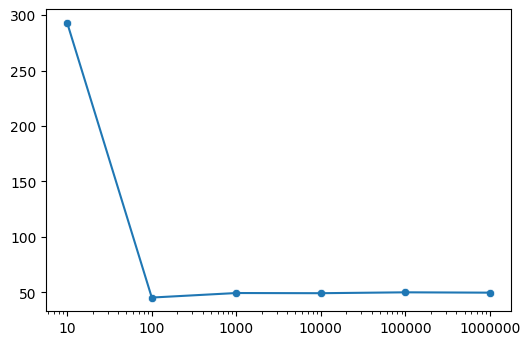

In [35]:
fig, ax = plt.subplots(dpi=100)
sns.scatterplot(x=n, y=RMSE_list)
sns.lineplot(x=n, y=RMSE_list)
ax.set_xscale('log')
ax.set_xticks(ticks=[10, 100, 1000, 10000, 100000, 1000000], labels=[10, 100, 1000, 10000, 100000, 1000000])